<a href="https://colab.research.google.com/github/CelesTech03/Data-Analytics-Winter-2022/blob/main/Python/Assignments/Election_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2020 Election Analysis Project

#Environment Set Up

In [1]:
#!pip install jupyter_dash # Installation

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd


from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
import plotly.express as px

import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output 

#Data Collection

In [3]:
# Reads in data
data = pd.read_csv('https://raw.githubusercontent.com/Ophineon/Data/main/2020electionturnoutrates')
data.head()

State  ... State Abv
0  United States  ...       NaN
1        Alabama  ...        AL
2         Alaska  ...        AK
3        Arizona  ...        AZ
4       Arkansas  ...        AR

[5 rows x 15 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                52 non-null     object
 1   Source                               40 non-null     object
 2   Official/Unofficial                  25 non-null     object
 3   Total Ballots Counted (Estimate)     52 non-null     object
 4   Vote for Highest Office (President)  24 non-null     object
 5   VEP Turnout Rate                     52 non-null     object
 6   Voting-Eligible Population (VEP)     52 non-null     object
 7   Voting-Age Population (VAP)          52 non-null     object
 8   % Non-citizen                        52 non-null     object
 9   Prison                               52 non-null     object
 10  Probation                            52 non-null     object
 11  Parole                               52 non-nul

In [5]:
data.describe()

State  ... State Abv
count       52  ...        51
unique      52  ...        51
top     Kansas  ...        CT
freq         1  ...         1

[4 rows x 15 columns]

In [6]:
data.shape

(52, 15)

In [7]:
data.dtypes

State                                  object
Source                                 object
Official/Unofficial                    object
Total Ballots Counted (Estimate)       object
Vote for Highest Office (President)    object
VEP Turnout Rate                       object
Voting-Eligible Population (VEP)       object
Voting-Age Population (VAP)            object
% Non-citizen                          object
Prison                                 object
Probation                              object
Parole                                 object
Total Ineligible Felon                 object
Overseas Eligible                      object
State Abv                              object
dtype: object

In [8]:
data.columns

Index(['State', 'Source', 'Official/Unofficial',
       'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
      dtype='object')

#Data Wrangling and EDA (Exploratory Data Analysis)

In [9]:
data.head()

State  ... State Abv
0  United States  ...       NaN
1        Alabama  ...        AL
2         Alaska  ...        AK
3        Arizona  ...        AZ
4       Arkansas  ...        AR

[5 rows x 15 columns]

In [10]:
# Drops unnecessary columns 
data.drop(['Official/Unofficial', 'Source', 'State Abv', 'Overseas Eligible','Vote for Highest Office (President)'], axis=1, inplace=True)

In [11]:
# Removing commas from data in order to convert it to numeric
data = data.replace(',', '', regex = True)

In [12]:
# Drops the United States row which can create an outlier
data = data.iloc[1:, :]

In [13]:
data.head()

State Total Ballots Counted (Estimate)  ...  Parole Total Ineligible Felon
1     Alabama                          2306587  ...   10266                  67782
2      Alaska                           367000  ...    1348                   6927
3     Arizona                          3400000  ...    7536                  93699
4    Arkansas                          1212030  ...   24698                  64974
5  California                         16800000  ...  102586                 207316

[5 rows x 10 columns]

## Converting columns to numeric values in order to graph them and making necessary preparations in order to be able to plot the values.

In [14]:
# Turning each of these columns into numeric
data['Total Ballots Counted (Estimate)'] = data['Total Ballots Counted (Estimate)'].astype(int)
data['Voting-Eligible Population (VEP)'] = data['Voting-Eligible Population (VEP)'].astype(int)
data['Voting-Age Population (VAP)'] = data['Voting-Age Population (VAP)'].astype(int)
data['Prison'] = data['Prison'].astype(int)
data['Probation'] = data['Probation'].astype(int)
data['Parole'] = data['Parole'].astype(int)
data['Total Ineligible Felon'] = data['Total Ineligible Felon'].astype(int)
data['VEP Turnout Rate'] = data['VEP Turnout Rate'].str.rstrip('%').astype('float')
data['% Non-citizen'] = data['% Non-citizen'].str.rstrip('%').astype('float')

In [15]:
data.dtypes

State                                object
Total Ballots Counted (Estimate)      int64
VEP Turnout Rate                    float64
Voting-Eligible Population (VEP)      int64
Voting-Age Population (VAP)           int64
% Non-citizen                       float64
Prison                                int64
Probation                             int64
Parole                                int64
Total Ineligible Felon                int64
dtype: object

In [16]:
# Assigning state column to a variable
state = data['State']

In [17]:
data.head()

State  Total Ballots Counted (Estimate)  ...  Parole  Total Ineligible Felon
1     Alabama                           2306587  ...   10266                   67782
2      Alaska                            367000  ...    1348                    6927
3     Arizona                           3400000  ...    7536                   93699
4    Arkansas                           1212030  ...   24698                   64974
5  California                          16800000  ...  102586                  207316

[5 rows x 10 columns]

In [18]:
graph_df = data.copy()

#Analytical Questions

## 1. Which states have the highest prison and parole numbers?

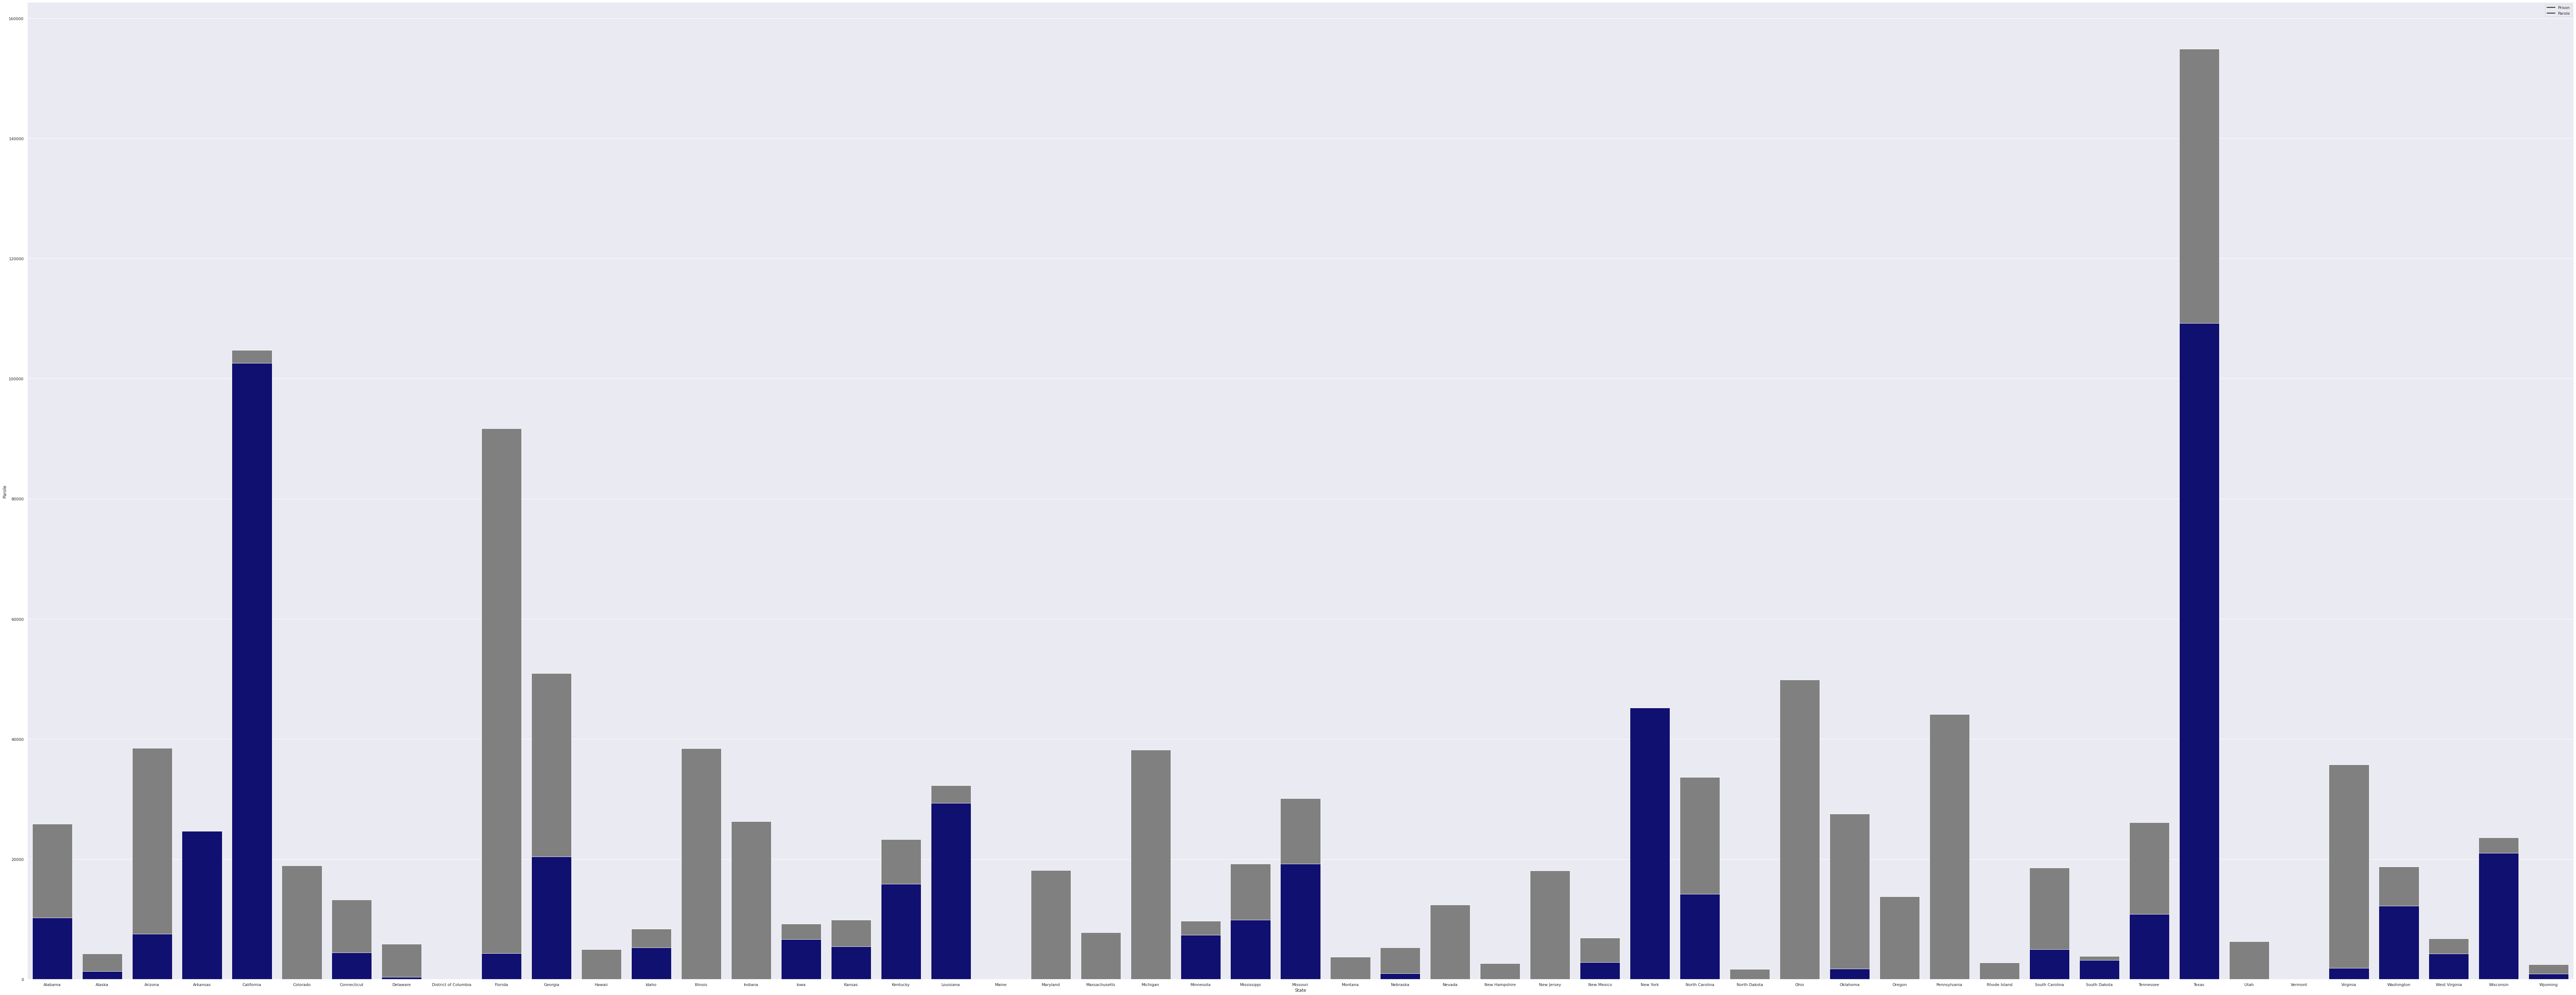

In [19]:
# Plotting the prison and parole numbers of each state
fig, ax = plt.subplots(figsize=(127,50))

ax = sns.barplot(x = 'State', y = 'Prison', data=data, color ='gray')
ax = sns.barplot(x = 'State', y = 'Parole', data=data, color = 'navy')

plt.legend(labels = ["Prison", "Parole"])
plt.show()

Texas and California had the highest amount of prison and parole numbers which is a factor to their vote numbers.

## 2. What were the statistics of the estimated total ballots counted?

In [20]:
# Using NumPy methods to find the statistics of Total Ballots Counted (Estimate)
mean = np.mean(graph_df['Total Ballots Counted (Estimate)'])
median = np.median(graph_df['Total Ballots Counted (Estimate)'])
mini = np.min(graph_df['Total Ballots Counted (Estimate)'])
maxi = np.max(graph_df['Total Ballots Counted (Estimate)'])
stddev = np.std(graph_df['Total Ballots Counted (Estimate)'])
print('SUMMARY STATS FOR TOTAL BALLOTS COUNTED:')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

SUMMARY STATS FOR TOTAL BALLOTS COUNTED:
Mean:  3114411.843137255 
Std Dev:  3231615.928834495 
Median:  2155000.0 
Min:  278503 
Max:  16800000


## 3. What were the statistics for the voting age population?

In [21]:
# Using NumPy methods to find the statistics of Voting-Age Population (VAP)
mean = np.mean(graph_df['Voting-Age Population (VAP)'])
median = np.median(graph_df['Voting-Age Population (VAP)'])
stddev = np.std(graph_df['Voting-Age Population (VAP)'])
print('SUMMARY STATS FOR VOTING AGE POPULATION:')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median)

SUMMARY STATS FOR VOTING AGE POPULATION:
Mean:  5051080.196078432 
Std Dev:  5693749.39572245 
Median:  3479257.0


In [22]:
# Using a sunburst plot to illustrate the Voting-Age Population of each state
fig = px.sunburst(graph_df, path=['State'], values='Voting-Age Population (VAP)')
app = JupyterDash(__name__)
app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

##We can see that the top three states with voter eligible population are California, Texas, and Florida.

##4. Which state has the most turnout voters?

In [23]:
# Sorting the VEP Turnout Rate column to display a better graph
sorted_turnout_graph = graph_df.sort_values(by = 'VEP Turnout Rate',ascending= False)

<BarContainer object of 51 artists>

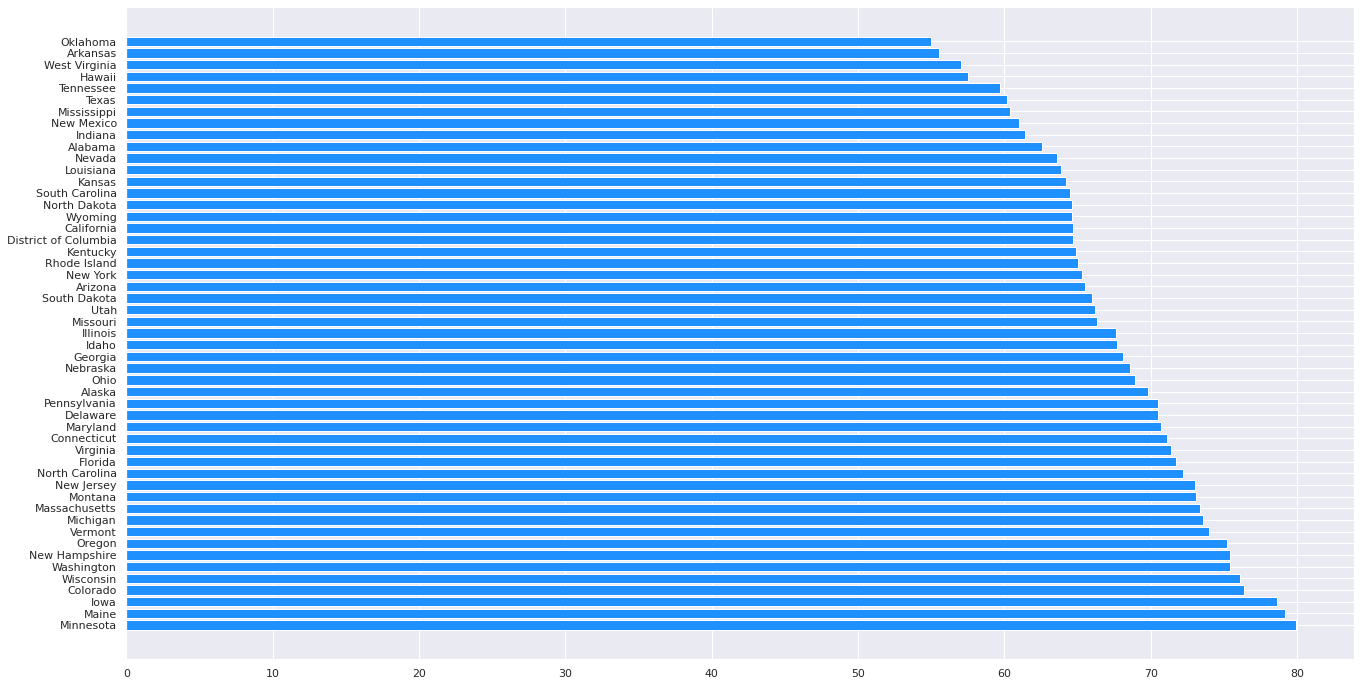

In [24]:
# Plotting the VEP Turnout Rate
plt.figure(figsize = (22,12))
plt.barh(sorted_turnout_graph['State'], sorted_turnout_graph['VEP Turnout Rate'], color ='dodgerblue')

## Minnesota had the highest turnout voters and Oklahoma had the lowest.

## 5. Which state had the highest estimated ballot count?

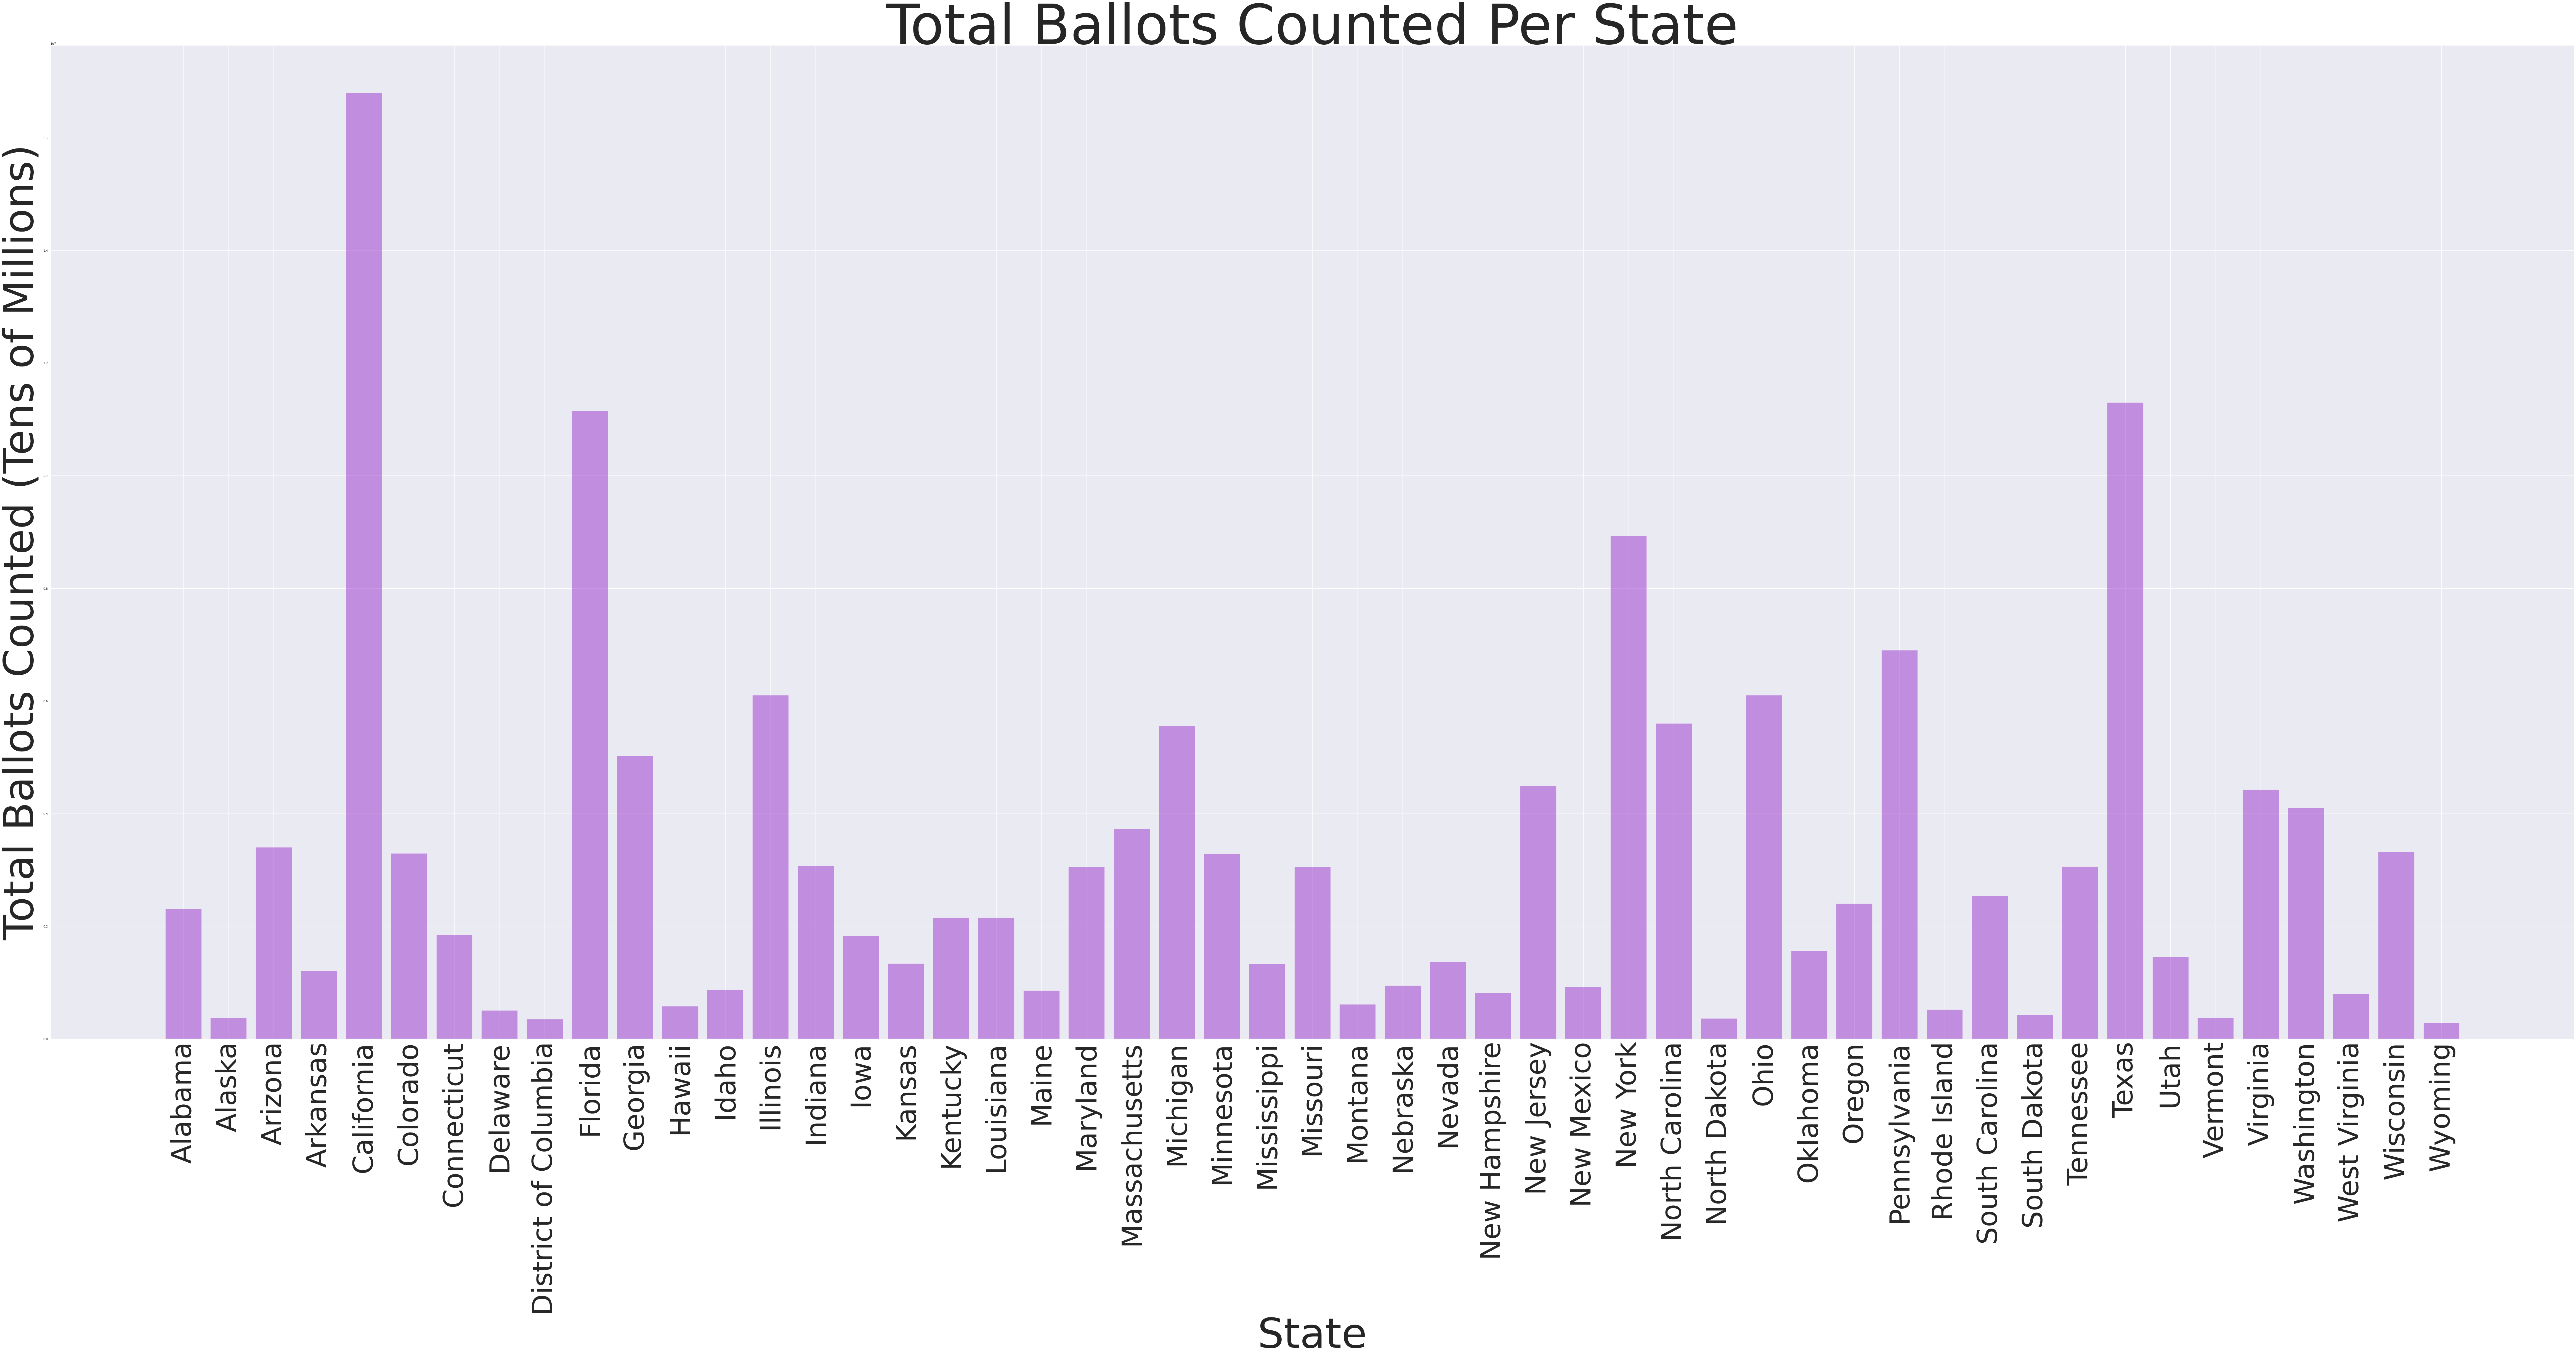

In [25]:
# Plotting the estimated total ballots counted
fig= plt.figure(figsize=(127,50))
plt.rcParams.update({'font.size': 22})
ax = fig.add_axes([0,0,1,1])
turnout = graph_df['Total Ballots Counted (Estimate)']
matplotlib.rc('ytick', labelsize=100) 
plt.bar(state, turnout, align='center', alpha=0.5, color ='darkorchid')
plt.setp(ax.get_xticklabels(), fontsize=100, rotation='vertical')
plt.title("Total Ballots Counted Per State", fontsize = 200)
plt.xlabel("State", fontsize = 150)
plt.ylabel("Total Ballots Counted (Tens of Millions)", fontsize = 150)
plt.show()

In [26]:
# Sunburst plot of total ballots counted (estimate) from each state
fig = px.sunburst(graph_df, path=['State'], values='Total Ballots Counted (Estimate)')
app = JupyterDash(__name__)
app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

##We can see that California had the highest amount of estimated counted ballots (16,800,000).